<a href="https://colab.research.google.com/github/sharonma1218/stats-306/blob/main/lab2_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2: ggplot and dplyr




In [ ]:
# install.packages('ggplot2')
# install.packages('dplyr')
# install.packages('palmerpenguins')
# install.packages('nycflights13')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Once you've downloaded all packages, command / so that doesn't install again when you run all.

In [ ]:
options(warn=-1)

library(palmerpenguins)
library(ggplot2)
library(dplyr)
library(nycflights13)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# Introducing ggplot

Every ggplot2 plot has three key components:

- data,

- A set of aesthetic mappings between variables in the data and visual properties, and

- At least one layer which describes how to render each observation. Layers are usually created with a geom function.

(Source: https://ggplot2-book.org/getting-started.html)

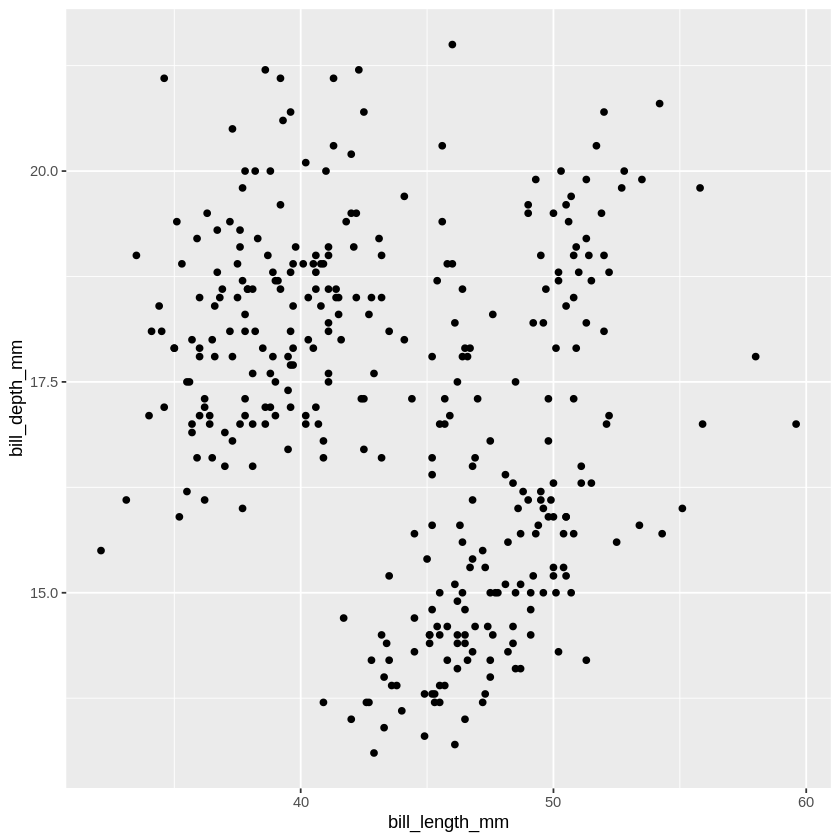

In [ ]:
# The first basic scatter plot
ggplot(data=penguins, mapping=aes(x=bill_length_mm, y=bill_depth_mm)) + 
    geom_point() # continue code on a new line with "+" operator

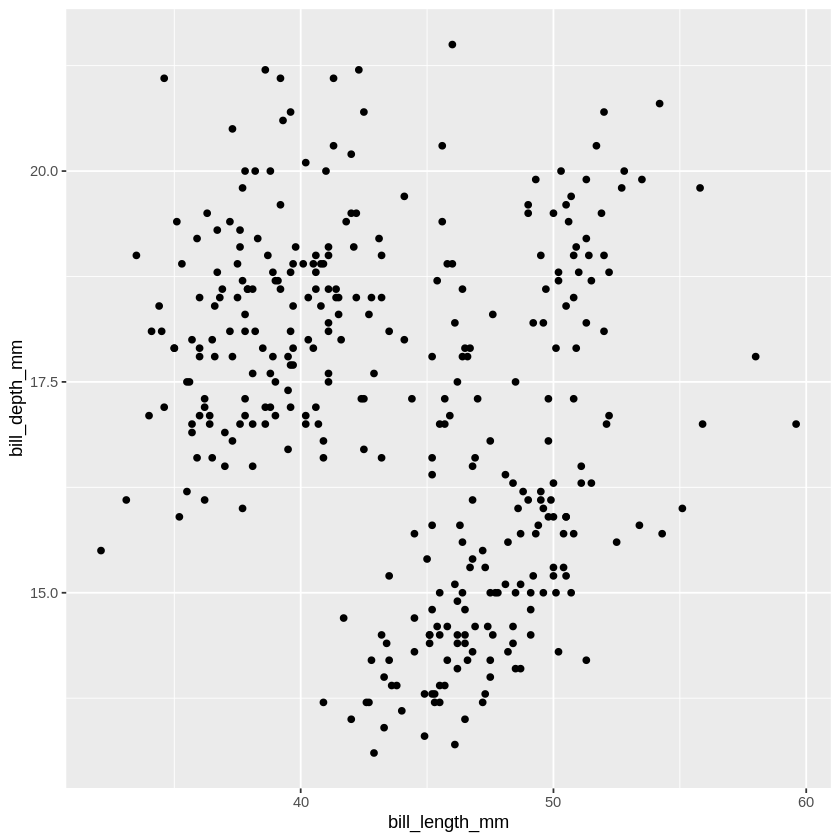

In [ ]:
# An equivalent way of plotting the above
ggplot(data=penguins) + 
    geom_point(aes(x=bill_length_mm, y=bill_depth_mm))

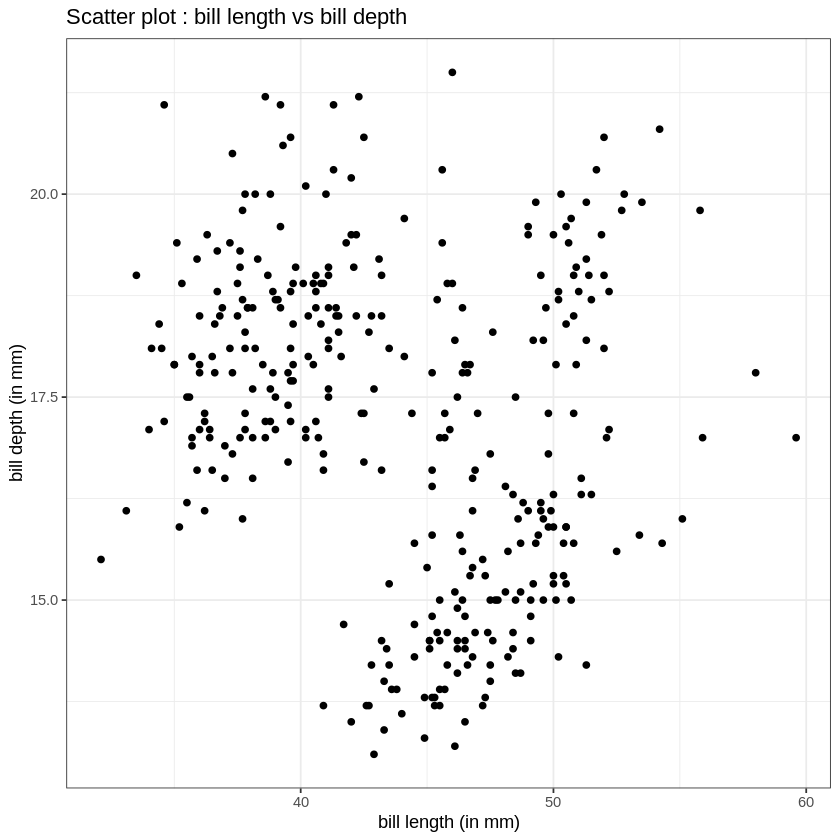

In [ ]:
#  A more professionally formatted plot
ggplot(data=penguins) + 
    geom_point(aes(x=bill_length_mm, y=bill_depth_mm)) +
    labs(x='bill length (in mm)', y='bill depth (in mm)') + # add axes' labels
    ggtitle('Scatter plot : bill length vs bill depth') +  # add plot's title
    theme_bw() # add a theme layer

### Layering Geometric Objects

Suppose we are interested in identifying trends in our data. We can plot a smooth line of best fit as follows.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


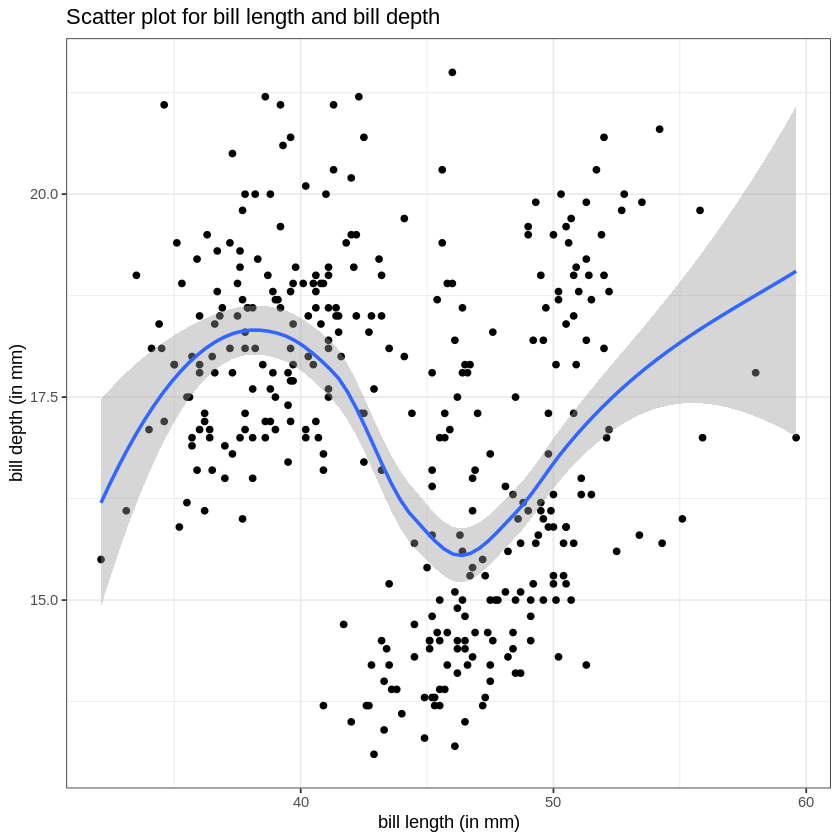

In [ ]:
ggplot(data=penguins, mapping=aes(x=bill_length_mm, y=bill_depth_mm)) + 
    geom_point() +
    geom_smooth() + # add a second smoothing line
    labs(x='bill length (in mm)', y='bill depth (in mm)') +
    ggtitle('Scatter plot for bill length and bill depth') + 
    theme_bw() 

### **Exercise 1**

Make a scatterplot of bill_depth_mm vs. bill_length_mm and color the points by species. What does adding coloring by species reveal about the relationship between these two variables?

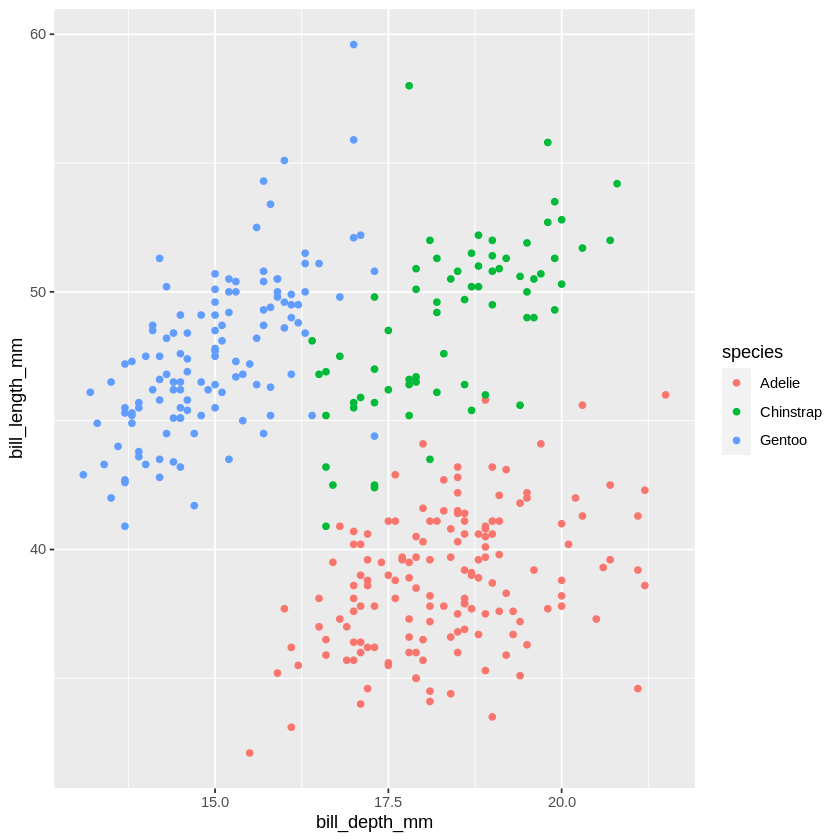

In [ ]:
ggplot(data=penguins,mapping=aes(x=bill_depth_mm,y=bill_length_mm))+
  geom_point(aes(color=species))

In [ ]:
#@title Answer to exercise 1

ggplot(data=penguins) + 
    geom_point(aes(x=bill_length_mm, y=bill_depth_mm,  color = species)) +
    labs(x='bill length (in mm)', y='bill depth (in mm)') + 
    ggtitle('Scatter plot : bill length vs bill depth') +  
    theme_bw() 

# the below illustration suggests that we can classify penguins' species by their
# combination of bill length and bill depth

### Bar plots, histograms and box plots with ggplot

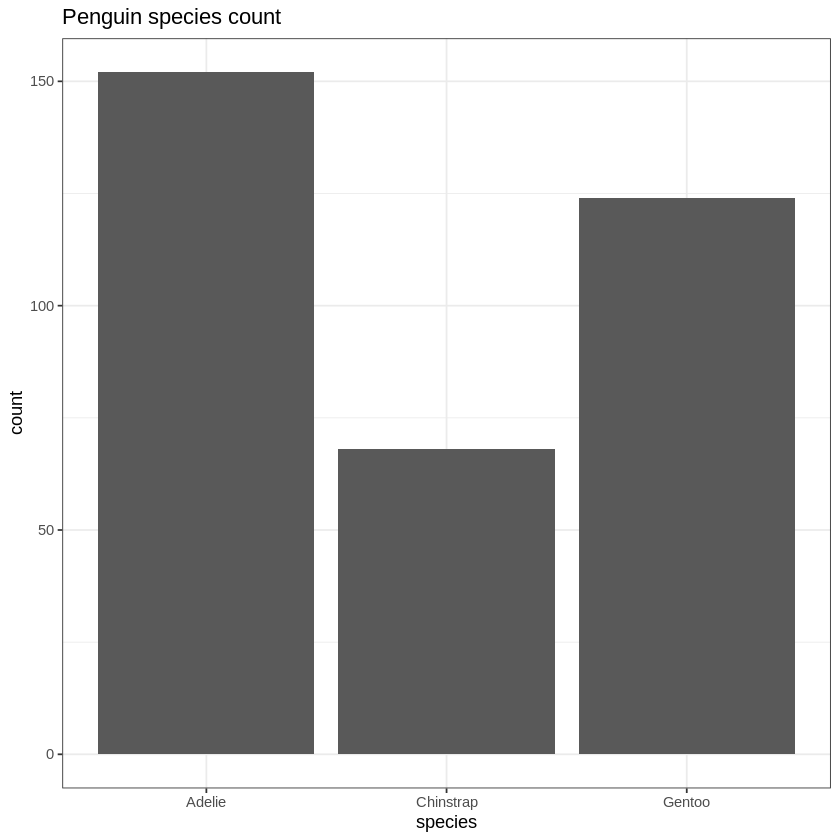

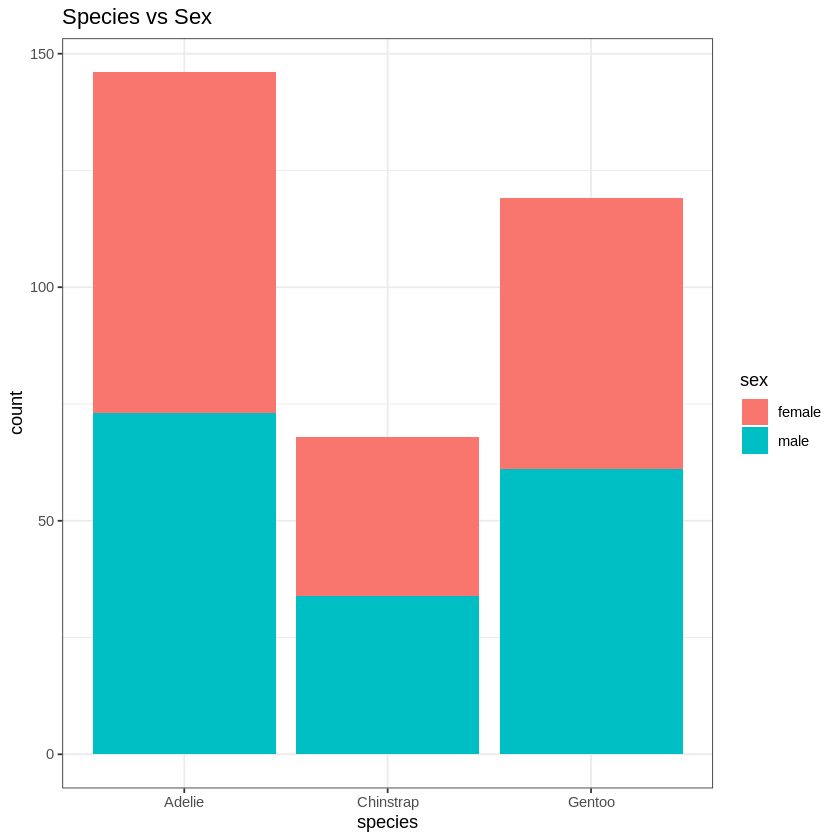

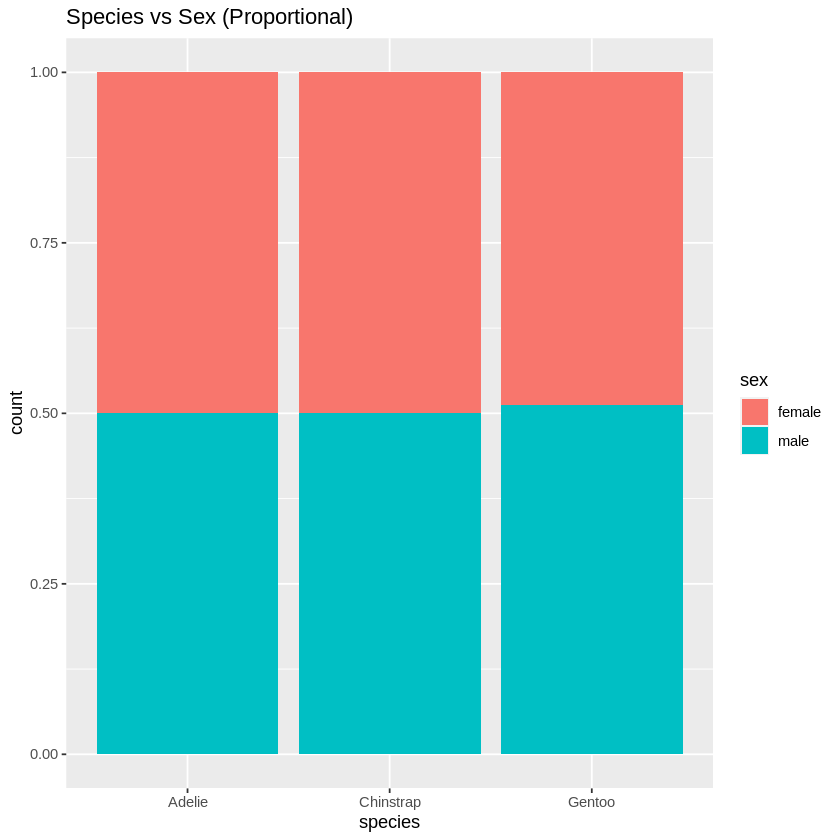

In [ ]:
# bar plot for  penguin species' counts
ggplot(penguins, aes(x = species)) +
  geom_bar() +
  ggtitle('Penguin species count') +
  theme_bw()

penguins_nona <- penguins %>% na.omit() # dropping rows with missing values. rmb that <- is same as = 

# using bar plot to visualise the relationship between species and sex
ggplot(penguins_nona, aes(x = species, fill = sex)) +
  geom_bar() +
  ggtitle('Species vs Sex') +
  theme_bw()

# using proportional bar plot to visualise the relationship between species and sex
ggplot(penguins_nona, aes(x = species, fill = sex)) +
  ggtitle('Species vs Sex (Proportional) ') +
  geom_bar(position = "fill") # if you want to do proportions instead of count, you need to add this line 

See reference for position = "fill": https://ggplot2.tidyverse.org/reference/position_stack.html

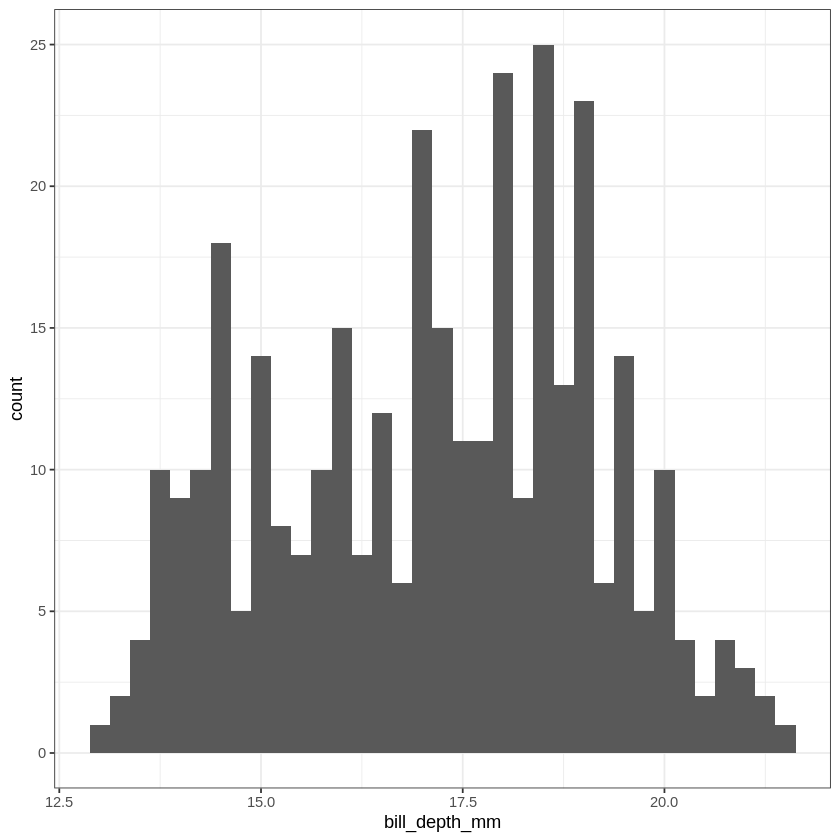

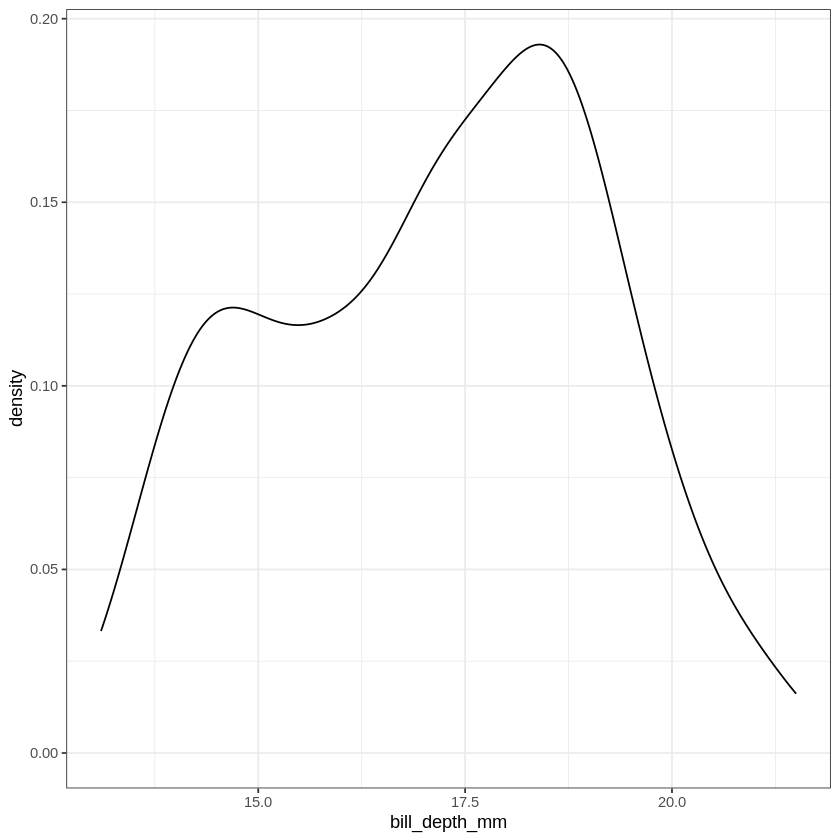

In [ ]:
# histogram plot for bill_depth_mm
ggplot(penguins, aes(x = bill_depth_mm)) +
  geom_histogram(binwidth = 0.25) +
  theme_bw()

# density plot for bill_depth_mm
ggplot(penguins, aes(x = bill_depth_mm)) +
  geom_density() +
  theme_bw()

Geom bar is for discrete data.
Geom histogram & density are for continuous data.

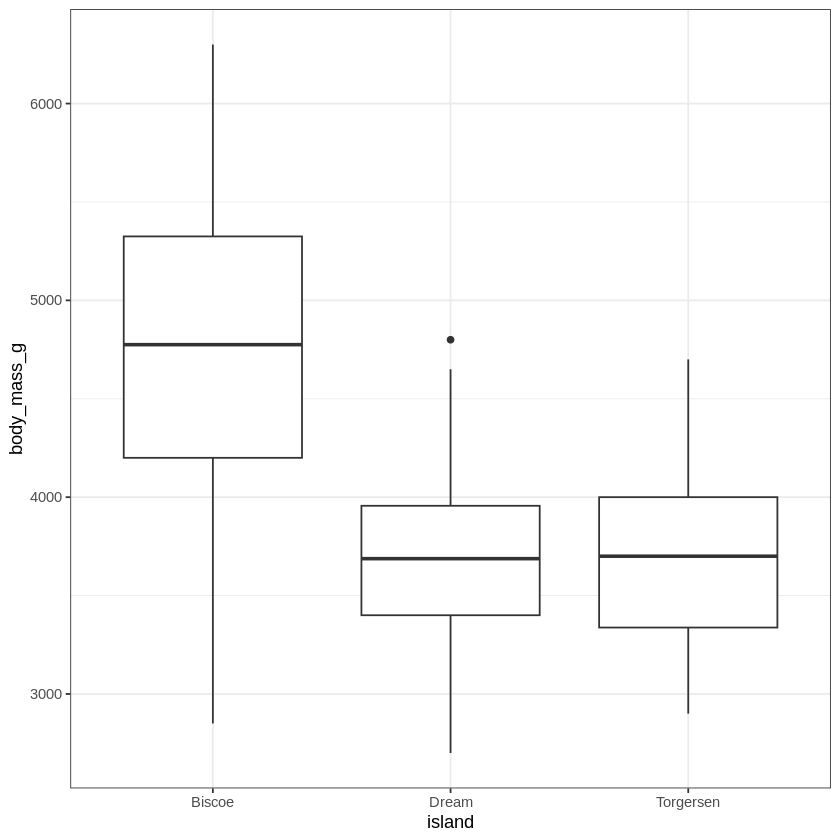

In [ ]:
# Use box plot to inspect penguins' boday mass across islands
ggplot(penguins, aes(x = island, y = body_mass_g)) +
  geom_boxplot() +
  theme_bw()

### **Exercise 2**

Create the following grahics:

1. A barplot for the counts of species subvided by island of which **the bars are not overlapped**.
2. A histogram plot for body_mass_g
3. A boxplot that explores the relationship between penguins'sex and body_mass_g **where the penguins' sex is the y-axis**.

In [ ]:
glimpse(penguins)

Rows: 344
Columns: 8
$ species           <fct> Adelie, Adelie, Adelie, Adelie, Adelie, Adelie, Adel…
$ island            <fct> Torgersen, Torgersen, Torgersen, Torgersen, Torgerse…
$ bill_length_mm    <dbl> 39.1, 39.5, 40.3, NA, 36.7, 39.3, 38.9, 39.2, 34.1, …
$ bill_depth_mm     <dbl> 18.7, 17.4, 18.0, NA, 19.3, 20.6, 17.8, 19.6, 18.1, …
$ flipper_length_mm <int> 181, 186, 195, NA, 193, 190, 181, 195, 193, 190, 186…
$ body_mass_g       <int> 3750, 3800, 3250, NA, 3450, 3650, 3625, 4675, 3475, …
$ sex               <fct> male, female, female, NA, female, male, female, male…
$ year              <int> 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007…


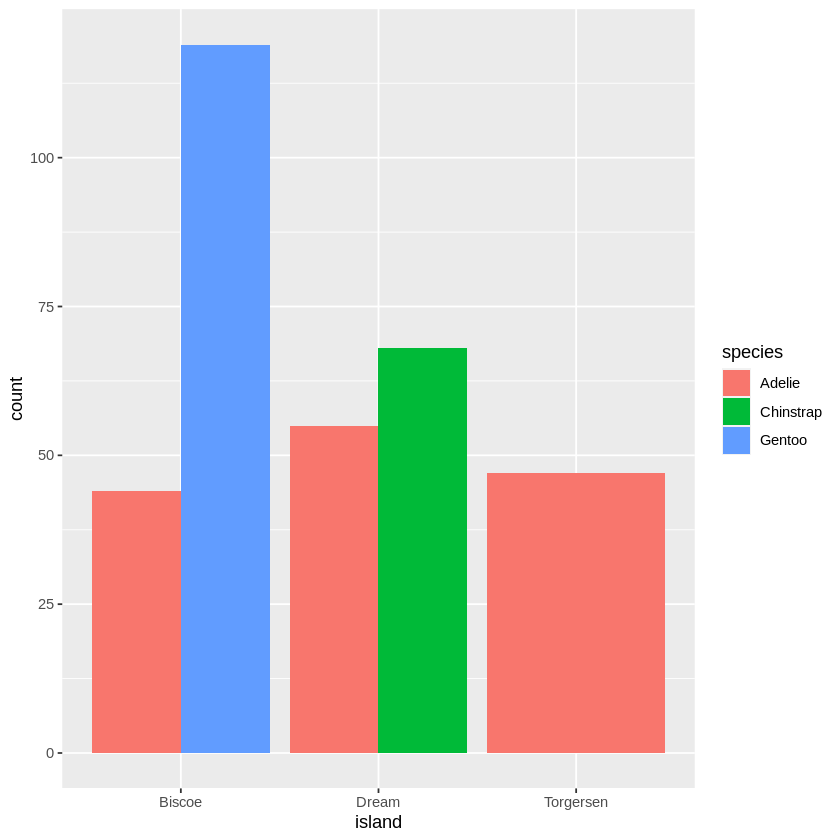

In [ ]:
ggplot(penguins_nona,aes(x=island,fill=species))+
  geom_bar(position="dodge")

In [ ]:
# ggplot(penguins, aes(x = bill_depth_mm)) +
#   geom_histogram(binwidth = 0.25) +
#   theme_bw()

ggplot(penguins,aes())

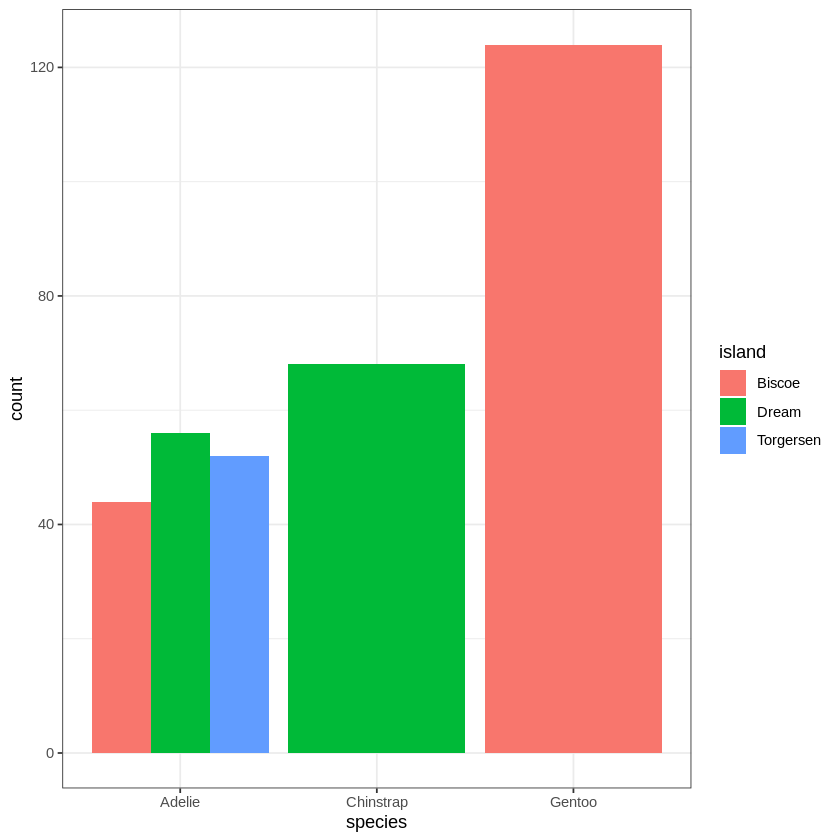

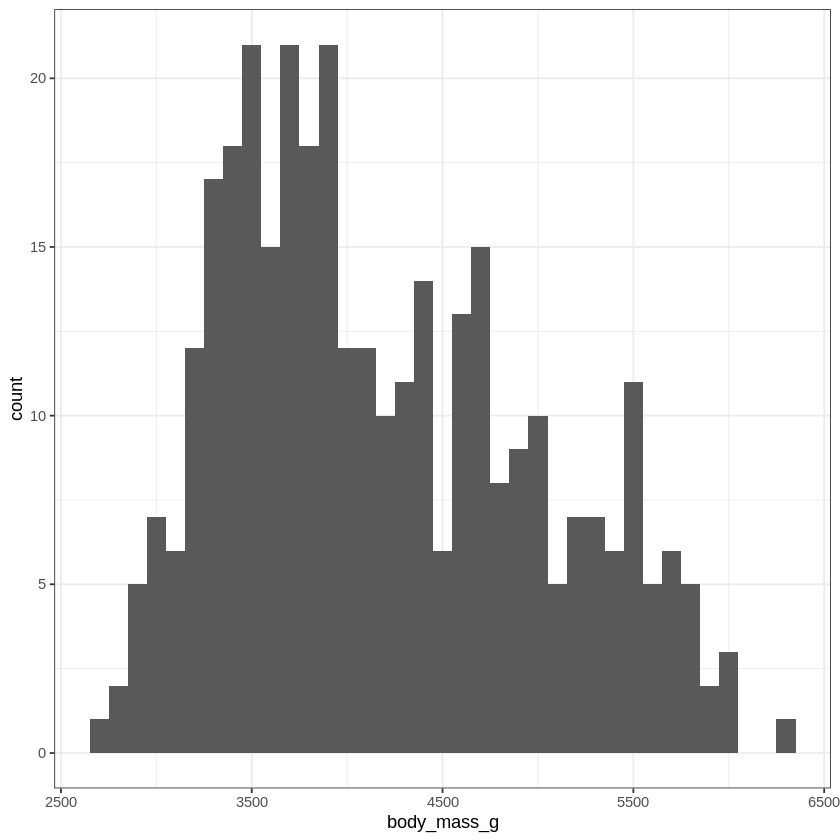

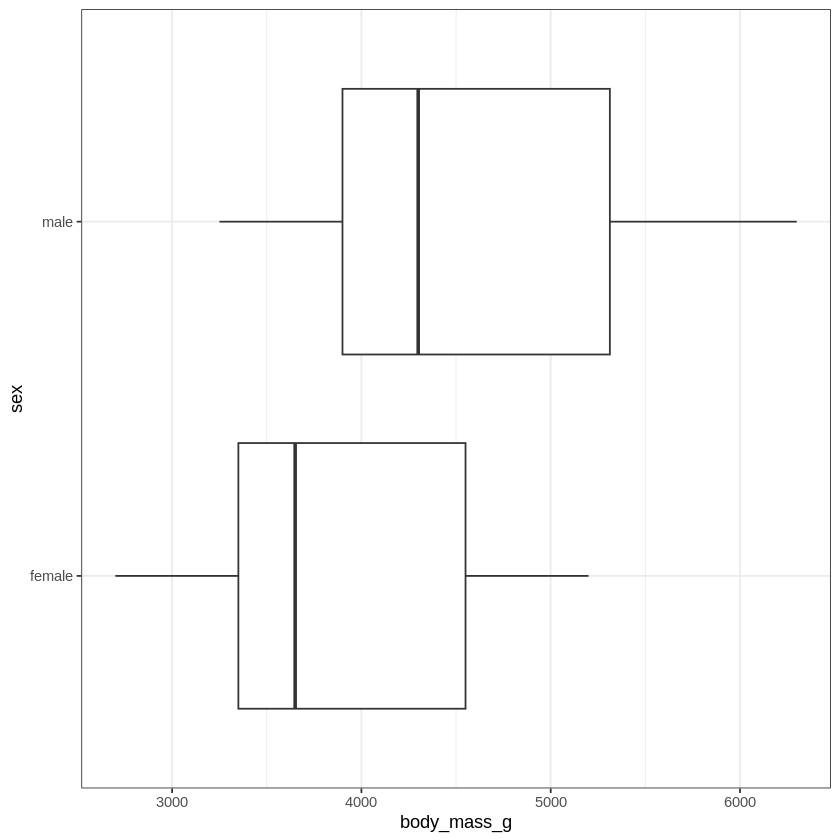

In [ ]:
#@title Answer to exercise 2
ggplot(penguins, aes(x = species, fill = island)) +
  geom_bar( position = "dodge") + # hoow to mmake ggplot with bars not overlap
  theme_bw()

ggplot(penguins, aes(x = body_mass_g)) +
  geom_histogram(binwidth = 100) +
  theme_bw()


penguins_nona = penguins %>% na.omit()
ggplot(penguins_nona, aes(x = sex, y = body_mass_g)) +
  geom_boxplot() +
  coord_flip() + # how to make box plots horizontal. part of hw.
  theme_bw()



# dplyr for data manipulation

In the next part of the lab, we are working with the dataframe "flights" from the library "nycflights13". 

In [ ]:
head(flights) # look at the first few rows of the dataframe

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [ ]:
# head(flight,100) reminder that you can always show the first n=100 rows instead of just 6 

In [ ]:
help(flights) # read the dataset descripion

There are five functions in dplyr: select, filter, arrange, mutate and summarise. All of them have the following properties:
1. The first argument is a data frame.
2. The subsequent arguments describe what to do with the data frame, using the variable names( without quotes).
3. The result is a new data frame.

## Select
This is used to reduce the number of columns that we're dealing with. Useful for things like genetic data

In [ ]:
names(flights) # if you only want to see the names of the columns/variables 

[1] "year"           "month"          "day"            "dep_time"      
 [5] "sched_dep_time" "dep_delay"      "arr_time"       "sched_arr_time"
 [9] "arr_delay"      "carrier"        "flight"         "tailnum"       
[13] "origin"         "dest"           "air_time"       "distance"      
[17] "hour"           "minute"         "time_hour"

In [ ]:
df <- select(flights, time_hour, carrier, flight, origin, dest, distance) # what are the columns you want to select/use in your work
print(df)

# A tibble: 336,776 × 6
   time_hour           carrier flight origin dest  distance
   <dttm>              <chr>    <int> <chr>  <chr>    <dbl>
 1 2013-01-01 05:00:00 UA        1545 EWR    IAH       1400
 2 2013-01-01 05:00:00 UA        1714 LGA    IAH       1416
 3 2013-01-01 05:00:00 AA        1141 JFK    MIA       1089
 4 2013-01-01 05:00:00 B6         725 JFK    BQN       1576
 5 2013-01-01 06:00:00 DL         461 LGA    ATL        762
 6 2013-01-01 05:00:00 UA        1696 EWR    ORD        719
 7 2013-01-01 06:00:00 B6         507 EWR    FLL       1065
 8 2013-01-01 06:00:00 EV        5708 LGA    IAD        229
 9 2013-01-01 06:00:00 B6          79 JFK    MCO        944
10 2013-01-01 06:00:00 AA         301 LGA    ORD        733
# … with 336,766 more rows


##### **Pipe**

Because the first argument is a data frame and the output is a data frame, dplyr verbs work well with the pipe, %>% (or |>). The pipe takes the thing on its left and passes it along to the function on its right

In [ ]:
# Another way of doing what we did above: 
flights %>%  
  select(time_hour, carrier, flight, origin, dest, distance) %>%  # select columns by name
  print() # print the resulted dataframe

In [ ]:
# Sometimes we don't need to write all of columns' names b/c they're next to each other:
flights %>% 
  select(carrier:distance) %>% # slice selecting all columns from carrier to distance
  print() 

# A tibble: 336,776 × 7
   carrier flight tailnum origin dest  air_time distance
   <chr>    <int> <chr>   <chr>  <chr>    <dbl>    <dbl>
 1 UA        1545 N14228  EWR    IAH        227     1400
 2 UA        1714 N24211  LGA    IAH        227     1416
 3 AA        1141 N619AA  JFK    MIA        160     1089
 4 B6         725 N804JB  JFK    BQN        183     1576
 5 DL         461 N668DN  LGA    ATL        116      762
 6 UA        1696 N39463  EWR    ORD        150      719
 7 B6         507 N516JB  EWR    FLL        158     1065
 8 EV        5708 N829AS  LGA    IAD         53      229
 9 B6          79 N593JB  JFK    MCO        140      944
10 AA         301 N3ALAA  LGA    ORD        138      733
# … with 336,766 more rows


In [ ]:
flights %>% 
  select( -c(year, month, day) ) %>% # do not show columns year, month, days
  print() 

# A tibble: 336,776 × 16
   dep_t…¹ sched…² dep_d…³ arr_t…⁴ sched…⁵ arr_d…⁶ carrier flight tailnum origin
     <int>   <int>   <dbl>   <int>   <int>   <dbl> <chr>    <int> <chr>   <chr> 
 1     517     515       2     830     819      11 UA        1545 N14228  EWR   
 2     533     529       4     850     830      20 UA        1714 N24211  LGA   
 3     542     540       2     923     850      33 AA        1141 N619AA  JFK   
 4     544     545      -1    1004    1022     -18 B6         725 N804JB  JFK   
 5     554     600      -6     812     837     -25 DL         461 N668DN  LGA   
 6     554     558      -4     740     728      12 UA        1696 N39463  EWR   
 7     555     600      -5     913     854      19 B6         507 N516JB  EWR   
 8     557     600      -3     709     723     -14 EV        5708 N829AS  LGA   
 9     557     600      -3     838     846      -8 B6          79 N593JB  JFK   
10     558     600      -2     753     745       8 AA         301 N3ALAA  LGA   
# …

Use rename(), which is a variant of select(), to rename a column and keep all the variables that aren't explicitly mentioned:

In [ ]:
flights %>% 
  rename(x = carrier) %>%
  print()
# the orig would not exist anymore under the prev name 

# A tibble: 336,776 × 19
    year month   day dep_time sched_dep_…¹ dep_d…² arr_t…³ sched…⁴ arr_d…⁵ x    
   <int> <int> <int>    <int>        <int>   <dbl>   <int>   <int>   <dbl> <chr>
 1  2013     1     1      517          515       2     830     819      11 UA   
 2  2013     1     1      533          529       4     850     830      20 UA   
 3  2013     1     1      542          540       2     923     850      33 AA   
 4  2013     1     1      544          545      -1    1004    1022     -18 B6   
 5  2013     1     1      554          600      -6     812     837     -25 DL   
 6  2013     1     1      554          558      -4     740     728      12 UA   
 7  2013     1     1      555          600      -5     913     854      19 B6   
 8  2013     1     1      557          600      -3     709     723     -14 EV   
 9  2013     1     1      557          600      -3     838     846      -8 B6   
10  2013     1     1      558          600      -2     753     745       8 AA   
# …

Another option is to use select() in conjunction with the everything() helper. This is useful if you have a handful of variables you would like to move to the start of the dataframe

In [ ]:
flights %>% 
  select(carrier, tailnum, everything()) %>%
  print()
# we use this function when we want to move specific columns to the front 

# A tibble: 336,776 × 19
   carrier tailnum  year month   day dep_time sched_de…¹ dep_d…² arr_t…³ sched…⁴
   <chr>   <chr>   <int> <int> <int>    <int>      <int>   <dbl>   <int>   <int>
 1 UA      N14228   2013     1     1      517        515       2     830     819
 2 UA      N24211   2013     1     1      533        529       4     850     830
 3 AA      N619AA   2013     1     1      542        540       2     923     850
 4 B6      N804JB   2013     1     1      544        545      -1    1004    1022
 5 DL      N668DN   2013     1     1      554        600      -6     812     837
 6 UA      N39463   2013     1     1      554        558      -4     740     728
 7 B6      N516JB   2013     1     1      555        600      -5     913     854
 8 EV      N829AS   2013     1     1      557        600      -3     709     723
 9 B6      N593JB   2013     1     1      557        600      -3     838     846
10 AA      N3ALAA   2013     1     1      558        600      -2     753     745
# …

There are some helper functions for select():
    starts_with()
    ends_with()
    contains()
    
### Exercise 3.a:
Write code that wil have tailnum as the first column and the columns starting with the letter 'd' as the following columns.



In [ ]:
flights%>%
  select(tailnum,starts_with("d"),everything())%>%
  print()

# A tibble: 336,776 × 19
   tailnum   day dep_time dep_delay dest  distance  year month sched_d…¹ arr_t…²
   <chr>   <int>    <int>     <dbl> <chr>    <dbl> <int> <int>     <int>   <int>
 1 N14228      1      517         2 IAH       1400  2013     1       515     830
 2 N24211      1      533         4 IAH       1416  2013     1       529     850
 3 N619AA      1      542         2 MIA       1089  2013     1       540     923
 4 N804JB      1      544        -1 BQN       1576  2013     1       545    1004
 5 N668DN      1      554        -6 ATL        762  2013     1       600     812
 6 N39463      1      554        -4 ORD        719  2013     1       558     740
 7 N516JB      1      555        -5 FLL       1065  2013     1       600     913
 8 N829AS      1      557        -3 IAD        229  2013     1       600     709
 9 N593JB      1      557        -3 MCO        944  2013     1       600     838
10 N3ALAA      1      558        -2 ORD        733  2013     1       600     753
# …

In [ ]:
#@title Answer to exercise 3.a
flights %>% 
  select(tailnum, starts_with('d')) %>%
  print()

# A tibble: 336,776 × 6
   tailnum   day dep_time dep_delay dest  distance
   <chr>   <int>    <int>     <dbl> <chr>    <dbl>
 1 N14228      1      517         2 IAH       1400
 2 N24211      1      533         4 IAH       1416
 3 N619AA      1      542         2 MIA       1089
 4 N804JB      1      544        -1 BQN       1576
 5 N668DN      1      554        -6 ATL        762
 6 N39463      1      554        -4 ORD        719
 7 N516JB      1      555        -5 FLL       1065
 8 N829AS      1      557        -3 IAD        229
 9 N593JB      1      557        -3 MCO        944
10 N3ALAA      1      558        -2 ORD        733
# … with 336,766 more rows


## Filter
Used if you want to view or store a new dataset containing a subset of the full dataset.

In [ ]:
flights %>% 
  filter(carrier == 'UA') %>% # select only United Airline data records
  print()

# A tibble: 58,665 × 19
    year month   day dep_time sched_de…¹ dep_d…² arr_t…³ sched…⁴ arr_d…⁵ carrier
   <int> <int> <int>    <int>      <int>   <dbl>   <int>   <int>   <dbl> <chr>  
 1  2013     1     1      517        515       2     830     819      11 UA     
 2  2013     1     1      533        529       4     850     830      20 UA     
 3  2013     1     1      554        558      -4     740     728      12 UA     
 4  2013     1     1      558        600      -2     924     917       7 UA     
 5  2013     1     1      558        600      -2     923     937     -14 UA     
 6  2013     1     1      559        600      -1     854     902      -8 UA     
 7  2013     1     1      607        607       0     858     915     -17 UA     
 8  2013     1     1      611        600      11     945     931      14 UA     
 9  2013     1     1      623        627      -4     933     932       1 UA     
10  2013     1     1      628        630      -2    1016     947      29 UA     
# … 

Usually you want to store the newly subsetted data in memory. 

In [ ]:
ua_flights = flights %>% filter(carrier == 'UA')

Make sure to use '==' instead of '='. The former is to test equality while the latter is for assignments. 

In [ ]:
4 == 6 # == sign tests for equality so will give u false
x = 6 # = assigns a value to a variable so would just print the value 
x
x == 5


[1] FALSE

[1] 6

[1] FALSE

Use %in% if the filtering variable can take multiple values.

In [ ]:
 flights %>% 
   filter(carrier %in% c('UA', 'AA', 'DL')) %>% # get only rows with these specific carriers. pretty similar to hw. 
   print()
 # i want all the flights that have the carriers under United Airlines, American Airlines, and Delta 

# A tibble: 139,504 × 19
    year month   day dep_time sched_de…¹ dep_d…² arr_t…³ sched…⁴ arr_d…⁵ carrier
   <int> <int> <int>    <int>      <int>   <dbl>   <int>   <int>   <dbl> <chr>  
 1  2013     1     1      517        515       2     830     819      11 UA     
 2  2013     1     1      533        529       4     850     830      20 UA     
 3  2013     1     1      542        540       2     923     850      33 AA     
 4  2013     1     1      554        600      -6     812     837     -25 DL     
 5  2013     1     1      554        558      -4     740     728      12 UA     
 6  2013     1     1      558        600      -2     753     745       8 AA     
 7  2013     1     1      558        600      -2     924     917       7 UA     
 8  2013     1     1      558        600      -2     923     937     -14 UA     
 9  2013     1     1      559        600      -1     941     910      31 AA     
10  2013     1     1      559        600      -1     854     902      -8 UA     
# …

In [ ]:
# This is exactly the same as the above, in case it's easier to learn in this way: 
flights %>% 
   filter(carrier=="UA"|carrier=="AA"|carrier=="DL")%>% 
   print()

# A tibble: 139,504 × 19
    year month   day dep_time sched_de…¹ dep_d…² arr_t…³ sched…⁴ arr_d…⁵ carrier
   <int> <int> <int>    <int>      <int>   <dbl>   <int>   <int>   <dbl> <chr>  
 1  2013     1     1      517        515       2     830     819      11 UA     
 2  2013     1     1      533        529       4     850     830      20 UA     
 3  2013     1     1      542        540       2     923     850      33 AA     
 4  2013     1     1      554        600      -6     812     837     -25 DL     
 5  2013     1     1      554        558      -4     740     728      12 UA     
 6  2013     1     1      558        600      -2     753     745       8 AA     
 7  2013     1     1      558        600      -2     924     917       7 UA     
 8  2013     1     1      558        600      -2     923     937     -14 UA     
 9  2013     1     1      559        600      -1     941     910      31 AA     
10  2013     1     1      559        600      -1     854     902      -8 UA     
# …

## Logical conditions

In [ ]:
summer_flights = flights %>% filter(month == 6 | month == 7 | month == 8) 
# filtering for rows that satisfy one or all of the conditions

ua_december = flights %>% filter(carrier == 'UA' & month == 12) 
# filtering for rows that satisfy both conditions
# i want flights that have carrier UA & that occur in Dec 

short_flights = flights %>% filter(air_time < 60) 
# can do this because air_time is a numeric variable

In R, if you want to find if a variable's value is missing, use the is.na() function. In particular, do not check for equality with NA:

In [ ]:
x = 4

In [ ]:
x == NA
is.na(x) # to filter out empty rows/cols

[1] NA

[1] FALSE

This function can be used with filter() to remove the rows with NA values.

In [ ]:
flights_nona = flights %>% filter( !is.na(dep_time)) # how to drop out empty rows/cols from flights dataset. "is not na"

In [ ]:
print(dim(flights))
print(dim(flights_nona))

[1] 336776     19
[1] 328521     19


### Exercise 3.b

Write code using filter that selects all the rows of carrier 'AA' on the last day of month.

In [ ]:
month31=c(1,3,5,7,8,10,12)
month30=c(4,6,9,11)
month28=c(2)

flights%>%
  filter(carrier=="AA")%>%
  filter(((month %in% month31)&(day==31))|
    ((month %in% month30)&(day==30))|
    ((month %in% month28)&(day==28)))%>%
      print()

# A tibble: 1,055 × 19
    year month   day dep_time sched_de…¹ dep_d…² arr_t…³ sched…⁴ arr_d…⁵ carrier
   <int> <int> <int>    <int>      <int>   <dbl>   <int>   <int>   <dbl> <chr>  
 1  2013     1    31      540        540       0     851     850       1 AA     
 2  2013     1    31      554        600      -6     900     910     -10 AA     
 3  2013     1    31      554        600      -6     726     745     -19 AA     
 4  2013     1    31      600        610     -10     911     910       1 AA     
 5  2013     1    31      607        610      -3     924     915       9 AA     
 6  2013     1    31      626        630      -4     740     810     -30 AA     
 7  2013     1    31      628        635      -7     932     940      -8 AA     
 8  2013     1    31      638        630       8    1147    1140       7 AA     
 9  2013     1    31      651        700      -9     839     850     -11 AA     
10  2013     1    31      659        700      -1    1059    1015      44 AA     
# … w

In [ ]:
#@title Answer to exercise 3.b
month31 = c(1, 3, 5, 7, 8, 10, 12)
month30 = c(4, 6, 9, 11)
month28 = c(2)

# use filter with complex conditions
flights %>% 
  filter(carrier == 'AA') %>%
  filter( ( (month %in% month31) & (day == 31) ) | 
          ( (month %in% month30) & (day == 30) ) | 
          ( (month %in% month28) & (day == 28) ) ) %>%
  print()

## Arrange

Useful for ordering rows of the dataframe.

In [ ]:
flights %>%
  arrange(year, month, day, dep_time) %>% 
  print()
# can be done since year, month, day, dep_time are numeric

# A tibble: 336,776 × 19
    year month   day dep_time sched_de…¹ dep_d…² arr_t…³ sched…⁴ arr_d…⁵ carrier
   <int> <int> <int>    <int>      <int>   <dbl>   <int>   <int>   <dbl> <chr>  
 1  2013     1     1      517        515       2     830     819      11 UA     
 2  2013     1     1      533        529       4     850     830      20 UA     
 3  2013     1     1      542        540       2     923     850      33 AA     
 4  2013     1     1      544        545      -1    1004    1022     -18 B6     
 5  2013     1     1      554        600      -6     812     837     -25 DL     
 6  2013     1     1      554        558      -4     740     728      12 UA     
 7  2013     1     1      555        600      -5     913     854      19 B6     
 8  2013     1     1      557        600      -3     709     723     -14 EV     
 9  2013     1     1      557        600      -3     838     846      -8 B6     
10  2013     1     1      558        600      -2     753     745       8 AA     
# …

In [ ]:
# arranging in the increasing order of year the descending order of month, day
flights %>%
  arrange(year, desc(month), desc(day))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,12,31,13,2359,14,439,437,2,B6,839,N566JB,JFK,BQN,189,1576,23,59,2013-12-31 23:00:00
2013,12,31,18,2359,19,449,444,5,DL,412,N713TW,JFK,SJU,192,1598,23,59,2013-12-31 23:00:00
2013,12,31,26,2245,101,129,2353,96,B6,108,N374JB,JFK,PWM,50,273,22,45,2013-12-31 22:00:00
2013,12,31,459,500,-1,655,651,4,US,1895,N557UW,EWR,CLT,95,529,5,0,2013-12-31 05:00:00
2013,12,31,514,515,-1,814,812,2,UA,700,N470UA,EWR,IAH,223,1400,5,15,2013-12-31 05:00:00
2013,12,31,549,551,-2,925,900,25,UA,274,N577UA,EWR,LAX,346,2454,5,51,2013-12-31 05:00:00
2013,12,31,550,600,-10,725,745,-20,AA,301,N3CXAA,LGA,ORD,127,733,6,0,2013-12-31 06:00:00
2013,12,31,552,600,-8,811,826,-15,EV,3825,N14916,EWR,IND,118,645,6,0,2013-12-31 06:00:00
2013,12,31,553,600,-7,741,754,-13,DL,731,N333NB,LGA,DTW,86,502,6,0,2013-12-31 06:00:00


Missing values are always sorted at the end:

In [ ]:
df = tibble(x = c(5, NA, 2))
df %>% arrange(x)

x
<dbl>
2
5
NA


In [ ]:
df %>% arrange(desc(x))

x
<dbl>
5
2
NA


### Exercise 3.c
Use arrange to sort flights dataset by descending order of the division of distance by air_time. 

In [ ]:
flights%>%
  arrange(desc(distance/air_time))%>%
  print()

# A tibble: 336,776 × 19
    year month   day dep_time sched_de…¹ dep_d…² arr_t…³ sched…⁴ arr_d…⁵ carrier
   <int> <int> <int>    <int>      <int>   <dbl>   <int>   <int>   <dbl> <chr>  
 1  2013     5    25     1709       1700       9    1923    1937     -14 DL     
 2  2013     7     2     1558       1513      45    1745    1719      26 EV     
 3  2013     5    13     2040       2025      15    2225    2226      -1 EV     
 4  2013     3    23     1914       1910       4    2045    2043       2 EV     
 5  2013     1    12     1559       1600      -1    1849    1917     -28 DL     
 6  2013    11    17      650        655      -5    1059    1150     -51 DL     
 7  2013     2    21     2355       2358      -3     412     438     -26 B6     
 8  2013    11    17      759        800      -1    1212    1255     -43 AA     
 9  2013    11    16     2003       1925      38      17      36     -19 DL     
10  2013    11    16     2349       2359     -10     402     440     -38 B6     
# …

In [ ]:
#@title Answer to exercise 3.c

flights %>% 
  arrange(desc(distance / air_time)) %>%
  print()

# A tibble: 336,776 × 19
    year month   day dep_time sched_de…¹ dep_d…² arr_t…³ sched…⁴ arr_d…⁵ carrier
   <int> <int> <int>    <int>      <int>   <dbl>   <int>   <int>   <dbl> <chr>  
 1  2013     5    25     1709       1700       9    1923    1937     -14 DL     
 2  2013     7     2     1558       1513      45    1745    1719      26 EV     
 3  2013     5    13     2040       2025      15    2225    2226      -1 EV     
 4  2013     3    23     1914       1910       4    2045    2043       2 EV     
 5  2013     1    12     1559       1600      -1    1849    1917     -28 DL     
 6  2013    11    17      650        655      -5    1059    1150     -51 DL     
 7  2013     2    21     2355       2358      -3     412     438     -26 B6     
 8  2013    11    17      759        800      -1    1212    1255     -43 AA     
 9  2013    11    16     2003       1925      38      17      36     -19 DL     
10  2013    11    16     2349       2359     -10     402     440     -38 B6     
# …

### Mutate

The role of mutate() is to add new columns that are calculated from the existing columns. By default, mutate() adds new columns on the right hand side of your dataset

In [ ]:
flights %>% 
  mutate(speed = distance / air_time * 60) %>%
  print()

# A tibble: 336,776 × 20
    year month   day dep_time sched_de…¹ dep_d…² arr_t…³ sched…⁴ arr_d…⁵ carrier
   <int> <int> <int>    <int>      <int>   <dbl>   <int>   <int>   <dbl> <chr>  
 1  2013     1     1      517        515       2     830     819      11 UA     
 2  2013     1     1      533        529       4     850     830      20 UA     
 3  2013     1     1      542        540       2     923     850      33 AA     
 4  2013     1     1      544        545      -1    1004    1022     -18 B6     
 5  2013     1     1      554        600      -6     812     837     -25 DL     
 6  2013     1     1      554        558      -4     740     728      12 UA     
 7  2013     1     1      555        600      -5     913     854      19 B6     
 8  2013     1     1      557        600      -3     709     723     -14 EV     
 9  2013     1     1      557        600      -3     838     846      -8 B6     
10  2013     1     1      558        600      -2     753     745       8 AA     
# …

In [ ]:
# so another way of doing the exercise before:
flights %>% 
  mutate(speed = distance / air_time * 60) %>%
    arrange(desc(speed))%>%
  print()

# A tibble: 336,776 × 20
    year month   day dep_time sched_de…¹ dep_d…² arr_t…³ sched…⁴ arr_d…⁵ carrier
   <int> <int> <int>    <int>      <int>   <dbl>   <int>   <int>   <dbl> <chr>  
 1  2013     5    25     1709       1700       9    1923    1937     -14 DL     
 2  2013     7     2     1558       1513      45    1745    1719      26 EV     
 3  2013     5    13     2040       2025      15    2225    2226      -1 EV     
 4  2013     3    23     1914       1910       4    2045    2043       2 EV     
 5  2013     1    12     1559       1600      -1    1849    1917     -28 DL     
 6  2013    11    17      650        655      -5    1059    1150     -51 DL     
 7  2013     2    21     2355       2358      -3     412     438     -26 B6     
 8  2013    11    17      759        800      -1    1212    1255     -43 AA     
 9  2013    11    16     2003       1925      38      17      36     -19 DL     
10  2013    11    16     2349       2359     -10     402     440     -38 B6     
# …

To add the variables to the left hand side2 use .before.

In [ ]:
flights %>% 
  mutate(speed = distance / air_time * 60, .before = 1) %>%
  print()
# i want to put the new col speed before the 1st col. to put after 1st col, do .after=1 

# A tibble: 336,776 × 20
   speed  year month   day dep_time sched_dep_…¹ dep_d…² arr_t…³ sched…⁴ arr_d…⁵
   <dbl> <int> <int> <int>    <int>        <int>   <dbl>   <int>   <int>   <dbl>
 1  370.  2013     1     1      517          515       2     830     819      11
 2  374.  2013     1     1      533          529       4     850     830      20
 3  408.  2013     1     1      542          540       2     923     850      33
 4  517.  2013     1     1      544          545      -1    1004    1022     -18
 5  394.  2013     1     1      554          600      -6     812     837     -25
 6  288.  2013     1     1      554          558      -4     740     728      12
 7  404.  2013     1     1      555          600      -5     913     854      19
 8  259.  2013     1     1      557          600      -3     709     723     -14
 9  405.  2013     1     1      557          600      -3     838     846      -8
10  319.  2013     1     1      558          600      -2     753     745       8
# …

If you only want to keep the new variables, use transmute()

In [ ]:
flights %>% 
  transmute(speed = distance / air_time * 60) %>%
  print()
# i want to mutate a col named speed & drop all other cols 

# A tibble: 336,776 × 1
   speed
   <dbl>
 1  370.
 2  374.
 3  408.
 4  517.
 5  394.
 6  288.
 7  404.
 8  259.
 9  405.
10  319.
# … with 336,766 more rows


#### **if_else with mutate**

To create a new column which takes one value when a condition is TRUE and another value when it’s FALSE

In [ ]:
flights %>% 
  mutate(
    status = if_else( # i want to create a new variable named status 
      is.na(arr_delay), "cancelled", "scheduled"), # if the arr delay value is missing, then cancelled. otherwise, scheduled
    .keep = "used" # i only want to see the cols that i've specified in this code just now
  ) %>%
  print()

# A tibble: 336,776 × 2
   arr_delay status   
       <dbl> <chr>    
 1        11 scheduled
 2        20 scheduled
 3        33 scheduled
 4       -18 scheduled
 5       -25 scheduled
 6        12 scheduled
 7        19 scheduled
 8       -14 scheduled
 9        -8 scheduled
10         8 scheduled
# … with 336,766 more rows


In [ ]:
# returns all the cols in dataset: 
flights %>% 
  mutate(
    status = if_else( 
      is.na(arr_delay), "cancelled", "scheduled"),
    .keep = "unused" 
  ) %>%
  print()

# A tibble: 336,776 × 19
    year month   day dep_time sched_dep…¹ dep_d…² arr_t…³ sched…⁴ carrier flight
   <int> <int> <int>    <int>       <int>   <dbl>   <int>   <int> <chr>    <int>
 1  2013     1     1      517         515       2     830     819 UA        1545
 2  2013     1     1      533         529       4     850     830 UA        1714
 3  2013     1     1      542         540       2     923     850 AA        1141
 4  2013     1     1      544         545      -1    1004    1022 B6         725
 5  2013     1     1      554         600      -6     812     837 DL         461
 6  2013     1     1      554         558      -4     740     728 UA        1696
 7  2013     1     1      555         600      -5     913     854 B6         507
 8  2013     1     1      557         600      -3     709     723 EV        5708
 9  2013     1     1      557         600      -3     838     846 B6          79
10  2013     1     1      558         600      -2     753     745 AA         301
# …

#### **case_when()**

To use when there are more than two values.

In [ ]:
flights %>% 
  mutate(
    status = case_when(
      is.na(arr_delay)      ~ "cancelled", # if arr delay is missing, mark it as cancelled
      arr_delay < -30       ~ "very early", # if arr delay less than -30, mark as very early
      arr_delay < -15       ~ "early",
      abs(arr_delay) <= 15  ~ "on time",
      arr_delay > 15        ~ "late",
      arr_delay > 60        ~ "very late",
    ),
    .keep = "used"
  ) %>%
  print()

# A tibble: 336,776 × 2
   arr_delay status 
       <dbl> <chr>  
 1        11 on time
 2        20 late   
 3        33 late   
 4       -18 early  
 5       -25 early  
 6        12 on time
 7        19 late   
 8       -14 on time
 9        -8 on time
10         8 on time
# … with 336,766 more rows


### Exercise 3.d

Create the new column type_of_flight which can be "short-haul", "long-haul", "medium-haul". Short-haul is a flight whose air_time lasts anywhere from 30 minutes to 3 hours. Medium-haul is defined by flights lasting between 3-6 hours. And lastly, long-haul flights are those that extend beyond 6 hours. Note that you should remove all the rows with NA.

In [ ]:
?flights
# air time is in mins 

In [ ]:
flights%>%
  filter(!is.na(air_time))%>%
  mutate(type_of_flight=case_when(
  air_time>=30 & air_time<=180 ~ "short-haul",
  air_time>180 & air_time<=360 ~ "medium-haul",
  air_time>360 ~ "long-haul"
  ),
  .keep="used"
  )%>%
    print()

# A tibble: 327,346 × 2
   air_time type_of_flight
      <dbl> <chr>         
 1      227 medium-haul   
 2      227 medium-haul   
 3      160 short-haul    
 4      183 medium-haul   
 5      116 short-haul    
 6      150 short-haul    
 7      158 short-haul    
 8       53 short-haul    
 9      140 short-haul    
10      138 short-haul    
# … with 327,336 more rows


In [ ]:
#@title Answer to exercise 3.d

flights %>% 
  filter(!is.na(air_time)) %>%
  mutate(
    type_of_flight = case_when(
      air_time <  180       ~ "short-haul",
      air_time <  360       ~ "medium-haul",
      air_time >= 360       ~ "long-haul",
    ),
    .keep = "used"
  ) %>% print()

# A tibble: 327,346 × 2
   air_time type_of_flight
      <dbl> <chr>         
 1      227 medium-haul   
 2      227 medium-haul   
 3      160 short-haul    
 4      183 medium-haul   
 5      116 short-haul    
 6      150 short-haul    
 7      158 short-haul    
 8       53 short-haul    
 9      140 short-haul    
10      138 short-haul    
# … with 327,336 more rows



## summarise()
Generally used in concert with group_by() function. This is the most important grouped operation which collapses each group to a single row. Group summaries are seen in many applications.

**count rows with n()**

In [ ]:
# count number of records for each carrier
flights %>% 
  count(carrier, sort = TRUE) %>%
  print()

# An equivalent way using group_by and summarize()
flights %>%
  group_by(carrier) %>% 
  summarize(
    n = n(),
  ) %>% 
  arrange(desc(n)) %>%
  print()

# A tibble: 16 × 2
   carrier     n
   <chr>   <int>
 1 UA      58665
 2 B6      54635
 3 EV      54173
 4 DL      48110
 5 AA      32729
 6 MQ      26397
 7 US      20536
 8 9E      18460
 9 WN      12275
10 VX       5162
11 FL       3260
12 AS        714
13 F9        685
14 YV        601
15 HA        342
16 OO         32
# A tibble: 16 × 2
   carrier     n
   <chr>   <int>
 1 UA      58665
 2 B6      54635
 3 EV      54173
 4 DL      48110
 5 AA      32729
 6 MQ      26397
 7 US      20536
 8 9E      18460
 9 WN      12275
10 VX       5162
11 FL       3260
12 AS        714
13 F9        685
14 YV        601
15 HA        342
16 OO         32


**sum()**

In [ ]:
flights %>% 
  group_by(carrier, tailnum) %>% 
  summarize(miles = sum(distance)) %>% # count the miles traveled by each plane
  print()

`summarise()` has grouped output by 'carrier'. You can override using the
`.groups` argument.


# A tibble: 4,067 × 3
# Groups:   carrier [16]
   carrier tailnum miles
   <chr>   <chr>   <dbl>
 1 9E      N146PQ   6080
 2 9E      N153PQ   3800
 3 9E      N161PQ   2280
 4 9E      N162PQ   1248
 5 9E      N170PQ   5278
 6 9E      N176PQ   4776
 7 9E      N181PQ   2496
 8 9E      N187PQ   3528
 9 9E      N197PQ   1520
10 9E      N200PQ   5320
# … with 4,057 more rows


**Minimum, maximum, and quantiles**

min() and max() will give you the largest and smallest values. Another powerful tool is quantile() which is a generalization of the median: quantile(x, 0.25) will find the value of x that is greater than 25% of the values.

Let's inspect the departure delay time for each day in flights dataset in more details.

In [ ]:
flights %>%
  group_by(year, month, day) %>%
  summarize(
    max = max(dep_delay, na.rm = TRUE), # max departure delay
    min = min(dep_delay, na.rm = TRUE), # max departure delay
    q5 = quantile(dep_delay, 0.05, na.rm = TRUE), # 5 percentile value of departure delay
    q95 = quantile(dep_delay, 0.95, na.rm = TRUE), # 95 percemntile of departure delay
    .groups = "drop"
) %>% print()

# A tibble: 365 × 7
    year month   day   max   min     q5   q95
   <int> <int> <int> <dbl> <dbl>  <dbl> <dbl>
 1  2013     1     1   853   -15  -8     70.1
 2  2013     1     2   379   -13  -7     85  
 3  2013     1     3   291   -13  -7.85  68  
 4  2013     1     4   288   -19  -8     60  
 5  2013     1     5   327   -16  -8     41  
 6  2013     1     6   202   -15  -8     51  
 7  2013     1     7   366   -17  -9     51.6
 8  2013     1     8   188   -16 -10     35.3
 9  2013     1     9  1301   -17 -10     27.2
10  2013     1    10  1126   -17 -10     31  
# … with 355 more rows


**Center and spread**

We often use mean() to summarize the center of a vector of values. Because the mean is the sum divided by the count, it is sensitive to even just a few unusually high or low values. An alternative is to use the median(), which finds a value that lies in the “middle” of the vector, i.e. 50% of the values is above it and 50% are below it. 

Two commonly used summaries to measure the spread of data values are the standard deviation, sd(x), and the inter-quartile range, IQR(). IQR() is quantile(x, 0.75) - quantile(x, 0.25)

In [ ]:
# air time by each airplanes
flights %>% 
  filter(!is.na(air_time)) %>%
  group_by(carrier, tailnum) %>%
  summarize(
    distance_mean = mean(air_time), # mean
    distance_median = median(air_time), # median
    distance_iqr = IQR(air_time), # IQR distance
    distance_sd = sd(air_time), # sd of distance
    .groups = "drop" # 
  ) %>%  print() 

# A tibble: 4,054 × 6
   carrier tailnum distance_mean distance_median distance_iqr distance_sd
   <chr>   <chr>           <dbl>           <dbl>        <dbl>       <dbl>
 1 9E      N146PQ          114.            114.          14.5        9.47
 2 9E      N153PQ          121.            124           20         10.6 
 3 9E      N161PQ          113             113            0          0   
 4 9E      N162PQ           98.5            98.5         14.5       20.5 
 5 9E      N170PQ          113.            113            9.5        6.95
 6 9E      N176PQ          115.            118           28         22.7 
 7 9E      N181PQ          108.            109           39.2       26.4 
 8 9E      N187PQ          114.            117           12         17.0 
 9 9E      N197PQ          116.            116.           1.5        2.12
10 9E      N200PQ          122.            122           11.5       10.9 
# … with 4,044 more rows


In [ ]:
x=c(1,2,3,NA)
mean(x) 
mean(x,na.rm=TRUE) # don't forget to drop the NA 

[1] NA

[1] 2

### Exercise 3.e

Which destinations show the greatest variation in air speed ? Air speed is defined as distance divided by air time (miles/hour).

In [ ]:
#@title Answer to exercise 3.e

flights_var =  flights %>% 
    filter(!is.na(air_time) & !is.na(distance)) %>%
    mutate(air_speed = distance / air_time * 60) %>% # create the new column air_speed with mutate()
    group_by(dest) %>%
    summarise(
      speed_sd = sd(air_speed),
      speed_iqr = IQR(air_speed)
    )
  
flights_var %>% arrange(desc(speed_sd)) %>% head(3)
flights_var %>% arrange(desc(speed_iqr)) %>% head(3)

# OKC has the highest variation in term of air speed SD.
# HOU has the highest variation in term of air speed IQR.